<a href="https://colab.research.google.com/github/nogaklein00/EX4_326364007_214444655/blob/main/ex4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VGG19**

100%|██████████| 345M/345M [00:16<00:00, 20.4MB/s]


Extracting /content/flowers102/flowers-102/102flowers.tgz to /content/flowers102/flowers-102


100%|██████████| 502/502 [00:00<00:00, 583kB/s]


100%|██████████| 15.0k/15.0k [00:00<00:00, 13.9MB/s]
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:02<00:00, 196MB/s]


Epoch 1/20
Train Loss: 4.5212, Train Acc: 0.0451
Val Loss: 4.1702, Val Acc: 0.1275
Test Loss: 4.1984, Test Acc: 0.1078
Epoch 2/20
Train Loss: 3.6363, Train Acc: 0.2108
Val Loss: 3.4021, Val Acc: 0.3078
Test Loss: 3.3683, Test Acc: 0.2980
Epoch 3/20
Train Loss: 2.6207, Train Acc: 0.4373
Val Loss: 2.6306, Val Acc: 0.4451
Test Loss: 2.6137, Test Acc: 0.4510
Epoch 4/20
Train Loss: 1.7524, Train Acc: 0.6186
Val Loss: 2.0383, Val Acc: 0.5471
Test Loss: 2.0327, Test Acc: 0.5784
Epoch 5/20
Train Loss: 1.2057, Train Acc: 0.7353
Val Loss: 1.7248, Val Acc: 0.6039
Test Loss: 1.7268, Test Acc: 0.6039
Epoch 6/20
Train Loss: 0.7847, Train Acc: 0.8353
Val Loss: 1.4958, Val Acc: 0.6510
Test Loss: 1.5193, Test Acc: 0.6333
Epoch 7/20
Train Loss: 0.5477, Train Acc: 0.8941
Val Loss: 1.3476, Val Acc: 0.6902
Test Loss: 1.3783, Test Acc: 0.6627
Epoch 8/20
Train Loss: 0.3533, Train Acc: 0.9441
Val Loss: 1.2819, Val Acc: 0.6804
Test Loss: 1.2846, Test Acc: 0.6882
Epoch 9/20
Train Loss: 0.2689, Train Acc: 0.9608

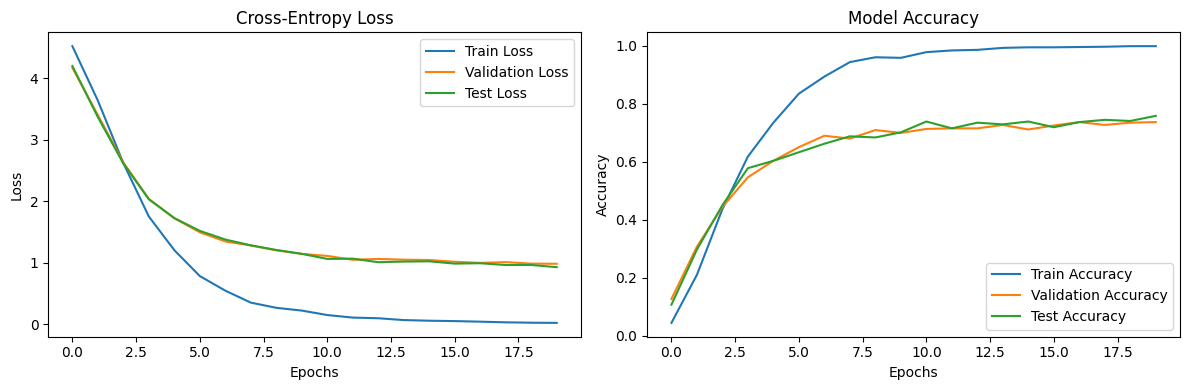

Epoch 1/20
Train Loss: 0.8122, Train Acc: 0.7931
Val Loss: 0.7111, Val Acc: 0.8294
Test Loss: 0.6841, Test Acc: 0.8314
Epoch 2/20
Train Loss: 0.4916, Train Acc: 0.8863
Val Loss: 0.6548, Val Acc: 0.8451
Test Loss: 0.5475, Test Acc: 0.8569
Epoch 3/20
Train Loss: 0.2623, Train Acc: 0.9392
Val Loss: 0.5734, Val Acc: 0.8667
Test Loss: 0.5019, Test Acc: 0.8686
Epoch 4/20
Train Loss: 0.1813, Train Acc: 0.9618
Val Loss: 0.5228, Val Acc: 0.8882
Test Loss: 0.4513, Test Acc: 0.8863
Epoch 5/20
Train Loss: 0.1059, Train Acc: 0.9863
Val Loss: 0.5353, Val Acc: 0.8647
Test Loss: 0.4371, Test Acc: 0.8902
Epoch 6/20
Train Loss: 0.0738, Train Acc: 0.9873
Val Loss: 0.4882, Val Acc: 0.8882
Test Loss: 0.4022, Test Acc: 0.8902
Epoch 7/20
Train Loss: 0.0483, Train Acc: 0.9931
Val Loss: 0.4818, Val Acc: 0.8765
Test Loss: 0.3938, Test Acc: 0.8922
Epoch 8/20
Train Loss: 0.0441, Train Acc: 0.9951
Val Loss: 0.4907, Val Acc: 0.8706
Test Loss: 0.4358, Test Acc: 0.9020
Epoch 9/20
Train Loss: 0.0346, Train Acc: 0.9941

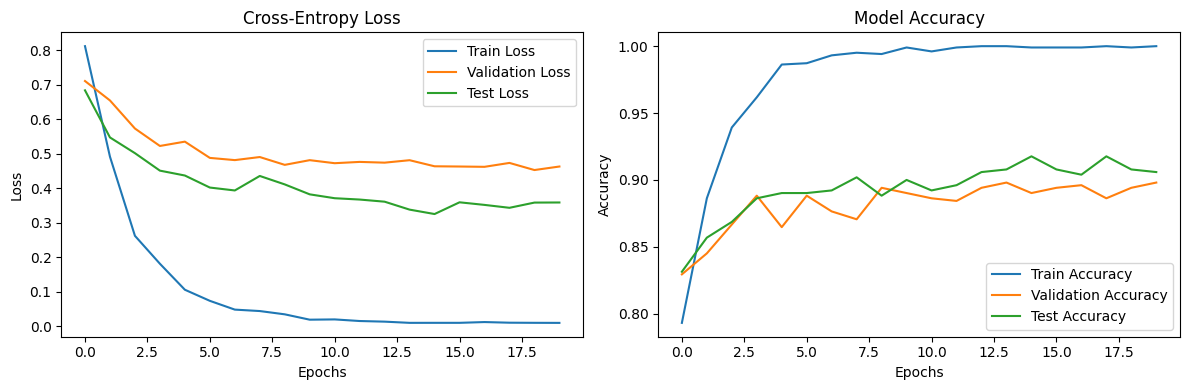

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

class DatasetManager:
    def __init__(self, root='/content/flowers102'):
        self.root = root
        self.transforms = self._get_transforms()

    def _get_transforms(self):
        return torchvision.transforms.Compose([
            torchvision.transforms.Resize((224, 224)),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

    def split_dataset(self, num_splits=2):  # 2 splits- can do more
        all_splits = []
        for _ in range(num_splits):
            train_dataset = torchvision.datasets.Flowers102(
                root=self.root,
                split='train',
                download=True,
                transform=self.transforms
            )
            val_dataset = torchvision.datasets.Flowers102(
                root=self.root,
                split='val',
                download=True,
                transform=self.transforms
            )
            test_dataset = torchvision.datasets.Flowers102(
                root=self.root,
                split='test',
                download=True,
                transform=self.transforms
            )
            combined_dataset = torch.utils.data.ConcatDataset([train_dataset, val_dataset])
            total_size = len(combined_dataset)
            val_count = int(total_size * 0.25)
            test_count = val_count
            train_count = total_size - val_count - test_count
            train_dataset, val_dataset, test_dataset = random_split(
                combined_dataset,
                [train_count, val_count, test_count],
                generator=torch.Generator().manual_seed(np.random.randint(1000))
            )
            all_splits.append({
                'train': train_dataset,
                'val': val_dataset,
                'test': test_dataset
            })
        return all_splits

    def get_dataloaders(self, batch_size=32, num_splits=2):
        splits = self.split_dataset(num_splits)
        dataloaders_list = []
        for split in splits:
            dataloaders = {
                phase: DataLoader(split[phase], batch_size=batch_size, shuffle=(phase == 'train'))
                for phase in ['train', 'val', 'test']
            }
            dataloaders_list.append(dataloaders)
        return dataloaders_list

class FlowerClassificationModel(nn.Module):
    def __init__(self, num_classes=102):
        super(FlowerClassificationModel, self).__init__()
        self.vgg19 = models.vgg19(pretrained=True)
        #Freeze feature extraction layers
        for param in self.vgg19.features.parameters():
            param.requires_grad = False
        #Replace the classifier head
        self.vgg19.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        return self.vgg19(x)

class ModelTrainer:
    def __init__(self, model, device='cuda'):
        self.model = model.to(device)
        self.device = device
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(model.parameters(), lr=0.0001)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', patience=3)

    def train_and_validate(self, dataloaders, epochs=20):
        history = {
            'train_loss': [], 'val_loss': [],
            'train_acc': [], 'val_acc': [],
            'test_loss': [], 'test_acc': []
        }
        for epoch in range(epochs):
            train_loss, train_acc = self._train_epoch(dataloaders['train'])
            val_loss, val_acc = self._validate(dataloaders['val'])
            test_loss, test_acc = self._validate(dataloaders['test'])
            self.scheduler.step(val_loss)
            history['train_loss'].append(train_loss)
            history['val_loss'].append(val_loss)
            history['train_acc'].append(train_acc)
            history['val_acc'].append(val_acc)
            history['test_loss'].append(test_loss)
            history['test_acc'].append(test_acc)
            print(f"Epoch {epoch+1}/{epochs}")
            print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
            print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
            print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
        return history

    def _train_epoch(self, train_loader):
        self.model.train()
        total_loss, total_correct, total_samples = 0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(self.device), labels.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()
            total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
        return total_loss / total_samples, total_correct / total_samples

    def _validate(self, loader):
        self.model.eval()
        total_loss, total_correct, total_samples = 0, 0, 0
        with torch.no_grad():
            for inputs, labels in loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                total_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total_correct += (predicted == labels).sum().item()
                total_samples += labels.size(0)
        return total_loss / total_samples, total_correct / total_samples

    def plot_results(self, history):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history['train_loss'], label='Train Loss')
        plt.plot(history['val_loss'], label='Validation Loss')
        plt.plot(history['test_loss'], label='Test Loss')
        plt.title('Cross-Entropy Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.subplot(1, 2, 2)
        plt.plot(history['train_acc'], label='Train Accuracy')
        plt.plot(history['val_acc'], label='Validation Accuracy')
        plt.plot(history['test_acc'], label='Test Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    dataset_manager = DatasetManager()
    dataloaders_list = dataset_manager.get_dataloaders(batch_size=32, num_splits=2)
    model_vgg = FlowerClassificationModel(num_classes=102)
    trainer_vgg = ModelTrainer(model_vgg)
    vgg_histories = []
    for dataloaders in dataloaders_list:
        history = trainer_vgg.train_and_validate(dataloaders, epochs=20)
        vgg_histories.append(history)
        trainer_vgg.plot_results(history)

In [ ]:
# The names of each class as taken from Kaggle
flower_dict = {
    0: 'pink primrose', 1: 'hard-leaved pocket orchid', 2: 'canterbury bells', 3: 'sweet pea', 4: 'english marigold',
    5: 'tiger lily', 6: 'moon orchid', 7: 'bird of paradise', 8: 'monkshood', 9: 'globe thistle', 10: 'snapdragon',
    11: "colt's foot", 12: 'king protea', 13: 'spear thistle', 14: 'yellow iris', 15: 'globe-flower', 16: 'purple coneflower',
    17: 'peruvian lily', 18: 'balloon flower', 19: 'giant white arum lily', 20: 'fire lily', 21: 'pincushion flower',
    22: 'fritillary', 23: 'red ginger', 24: 'grape hyacinth', 25: 'corn poppy', 26: 'prince of wales feathers', 27: 'stemless gentian',
    28: 'artichoke', 29: 'sweet william', 30: 'carnation', 31: 'garden phlox', 32: 'love in the mist', 33: 'mexican aster',
    34: 'alpine sea holly', 35: 'ruby-lipped cattleya', 36: 'cape flower', 37: 'great masterwort', 38: 'siam tulip',
    39: 'lenten rose', 40: 'barbeton daisy', 41: 'daffodil', 42: 'sword lily', 43: 'poinsettia', 44: 'bolero deep blue',
    45: 'wallflower', 46: 'marigold', 47: 'buttercup', 48: 'oxeye daisy', 49: 'common dandelion', 50: 'petunia', 51: 'wild pansy',
    52: 'primula', 53: 'sunflower', 54: 'pelargonium', 55: 'bishop of llandaff', 56: 'gaura', 57: 'geranium',
    58: 'orange dahlia', 59: 'pink-yellow dahlia', 60: 'cautleya spicata', 61: 'japanese anemone', 62: 'black-eyed susan',
    63: 'silverbush', 64: 'californian poppy', 65: 'osteospermum', 66: 'spring crocus', 67: 'bearded iris', 68: 'windflower',
    69: 'tree poppy', 70: 'gazania', 71: 'azalea', 72: 'water lily', 73: 'rose', 74: 'thorn apple', 75: 'morning glory',
    76: 'passion flower', 77: 'lotus lotus', 78: 'toad lily', 79: 'anthurium', 80: 'frangipani', 81: 'clematis', 82: 'hibiscus',
    83: 'columbine', 84: 'desert-rose', 85: 'tree mallow', 86: 'magnolia', 87: 'cyclamen', 88: 'watercress', 89: 'canna lily',
    90: 'hippeastrum', 91: 'bee balm', 92: 'ball moss', 93: 'foxglove', 94: 'bougainvillea', 95: 'camellia', 96: 'mallow',
    97: 'mexican petunia', 98: 'bromelia', 99: 'blanket flower', 100: 'trumpet creeper', 101: 'blackberry lily'
}

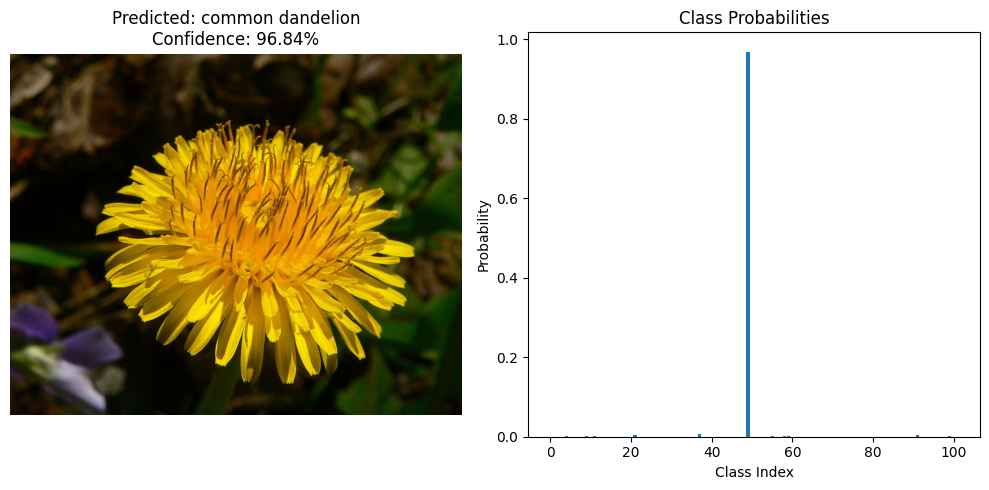

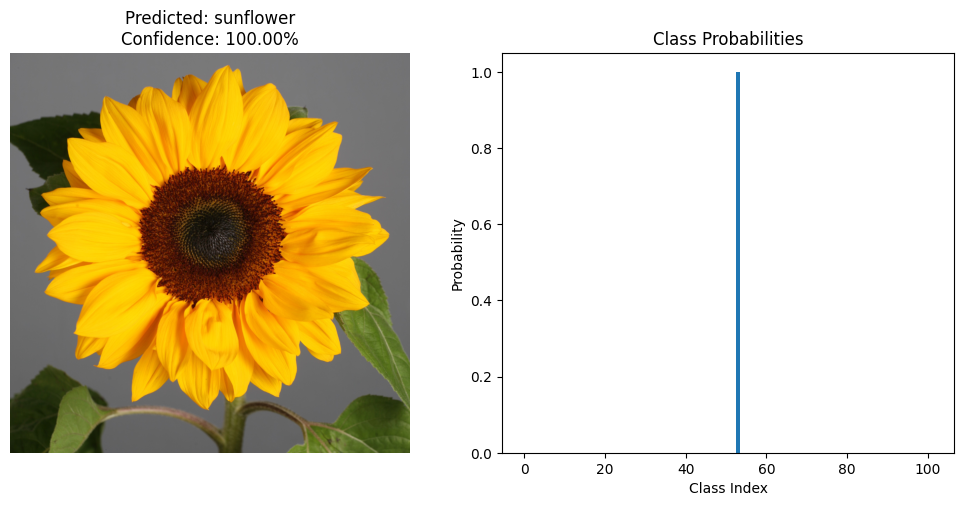

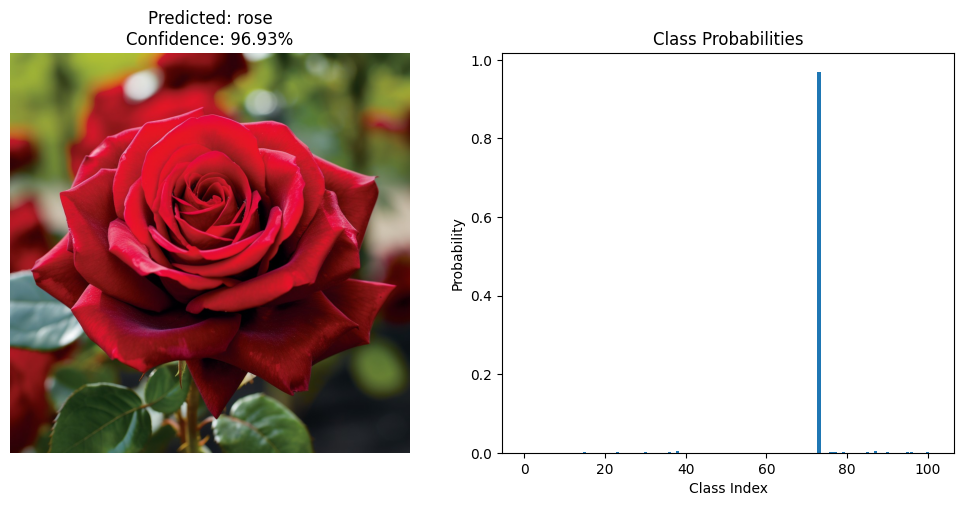

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms

def predict_and_display_image(model, image_path, class_dict, device='cuda'):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])

    original_image = Image.open(image_path)
    input_tensor = transform(original_image).unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        outputs = model(input_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        confidence, predicted_class = torch.max(probabilities, 1)
    confidence_percent = confidence.item() * 100
    predicted_class_name = class_dict[predicted_class.item()]
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title(f'Predicted: {predicted_class_name}\nConfidence: {confidence_percent:.2f}%')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.bar(range(len(class_dict)), probabilities[0].cpu().numpy())
    plt.title('Class Probabilities')
    plt.xlabel('Class Index')
    plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()
    return predicted_class_name, confidence_percent

# Test the model on images from the internet I'v uploaded
predicted_class, confidence = predict_and_display_image(model_vgg, '/bin/dandelionTest.jpeg', flower_dict)
predicted_class, confidence = predict_and_display_image(model_vgg, '/bin/SunflowerTest.jpeg', flower_dict)
predicted_class, confidence = predict_and_display_image(model_vgg, '/bin/RoseTest.jpeg', flower_dict)

# **YOLOV5**

In [7]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install -U ultralytics tqdm matplotlib
!pip install torchmetrics
!pip install ultralytics
!pip install imageio
!pip install scikit-image
!pip install roboflow
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt
import os
import yaml
from pathlib import Path
import shutil
from IPython.display import Image, display
import matplotlib.pyplot as plt
from scipy.io import loadmat

dataset_dir = Path("/content/dataset")
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/setid.mat
!mkdir flowers
!tar -xzf 102flowers.tgz -C flowers
!wget https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s-cls.pt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Total 17265 (delta 0), reused 0 (delta 0), pack-reused 17265 (from 1)
Receiving objects: 100% (17265/17265), 16.11 MiB | 35.41 MiB/s, done.
Resolving deltas: 1

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Training on Split 1
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 95.5MB/s]


Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/content/dataset/split1/flowers102.yaml, epochs=15, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=runs/flowers, name=split_1, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 44.0MB/s]


Overriding model.yaml nc=80 with nc=102

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralyti

100%|██████████| 5.35M/5.35M [00:00<00:00, 188MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/split1/train/labels... 4094 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4094/4094 [00:03<00:00, 1358.62it/s]


train: New cache created: /content/dataset/split1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/split1/val/labels... 2047 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2047/2047 [00:01<00:00, 1296.29it/s]

val: New cache created: /content/dataset/split1/val/labels.cache


Plotting labels to runs/flowers/split_1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.4e-05, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/flowers/split_1
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15       4.2G     0.4072      4.364      1.149         39        640: 100%|██████████| 256/256 [01:09<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:17<00:00,  3.67it/s]


                   all       2047       2047      0.375      0.174       0.11      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      4.33G     0.1299      2.864     0.9377         46        640: 100%|██████████| 256/256 [01:09<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.26it/s]


                   all       2047       2047      0.571      0.408      0.439      0.436

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      4.17G     0.1115      2.148     0.9151         44        640: 100%|██████████| 256/256 [01:09<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.28it/s]


                   all       2047       2047      0.672        0.6      0.667      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      4.16G     0.1029      1.763     0.9073         39        640: 100%|██████████| 256/256 [01:08<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.32it/s]

                   all       2047       2047      0.753       0.69      0.796      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      4.16G    0.09436      1.461     0.9036         42        640: 100%|██████████| 256/256 [01:08<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.31it/s]

                   all       2047       2047      0.786      0.778      0.854      0.853


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      4.17G     0.1029      1.229     0.8956         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.33it/s]

                   all       2047       2047      0.864      0.839       0.91      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      4.16G    0.08224     0.9226      0.878         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.35it/s]

                   all       2047       2047      0.879      0.849      0.917      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      4.16G    0.07456     0.7547      0.873         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.39it/s]

                   all       2047       2047        0.9      0.876      0.941       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      4.16G    0.06734     0.6452      0.869         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.33it/s]

                   all       2047       2047      0.917      0.892      0.948      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      4.16G    0.06423     0.5532     0.8668         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.34it/s]

                   all       2047       2047      0.914      0.901      0.954      0.953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      4.16G    0.05934      0.478     0.8667         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.30it/s]

                   all       2047       2047      0.931      0.911       0.96       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      4.16G    0.05615     0.4216     0.8663         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.38it/s]

                   all       2047       2047      0.937      0.916      0.966      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      4.16G    0.05397     0.3742      0.859         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.40it/s]

                   all       2047       2047      0.948      0.901      0.961      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      4.16G    0.05057     0.3415     0.8626         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.36it/s]

                   all       2047       2047      0.947      0.919      0.969      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      4.16G    0.04782     0.3192      0.863         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.41it/s]

                   all       2047       2047       0.95      0.917       0.97       0.97



15 epochs completed in 0.354 hours.
Optimizer stripped from runs/flowers/split_1/weights/last.pt, 18.6MB
Optimizer stripped from runs/flowers/split_1/weights/best.pt, 18.6MB

Validating runs/flowers/split_1/weights/best.pt...
Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5s summary (fused): 193 layers, 9,151,010 parameters, 0 gradients, 24.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:25<00:00,  2.53it/s]


                   all       2047       2047      0.952      0.937      0.973      0.973
               class_1         10         10          1      0.857      0.995      0.995
               class_2         15         15      0.928      0.933      0.958      0.958
               class_3         10         10      0.785        0.7      0.835      0.835
               class_4         14         14       0.95      0.714      0.841      0.841
               class_5         16         16      0.984      0.938      0.986      0.986
               class_6         11         11      0.979          1      0.995      0.995
               class_7         10         10      0.807       0.84      0.948      0.948
               class_8         21         21      0.943          1      0.993      0.993
               class_9         12         12      0.966      0.917      0.918      0.918
              class_10         11         11      0.909      0.909       0.98       0.98
              class_1

val: Scanning /content/dataset/split1/test/labels... 2048 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:01<00:00, 1426.92it/s]

val: New cache created: /content/dataset/split1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [00:20<00:00,  6.13it/s]


                   all       2048       2048       0.94      0.926       0.96       0.96
               class_1         10         10          1      0.646      0.889      0.889
               class_2         15         15       0.88          1      0.979      0.979
               class_3         10         10      0.694      0.682      0.837      0.837
               class_4         14         14      0.691      0.639      0.719      0.719
               class_5         16         16          1      0.879      0.971      0.971
               class_6         11         11      0.953      0.909      0.911      0.911
               class_7         10         10      0.732        0.9      0.951      0.951
               class_8         22         22      0.988          1      0.995      0.995
               class_9         11         11      0.823      0.909      0.903      0.903
              class_10         11         11      0.916          1      0.988      0.988
              class_1

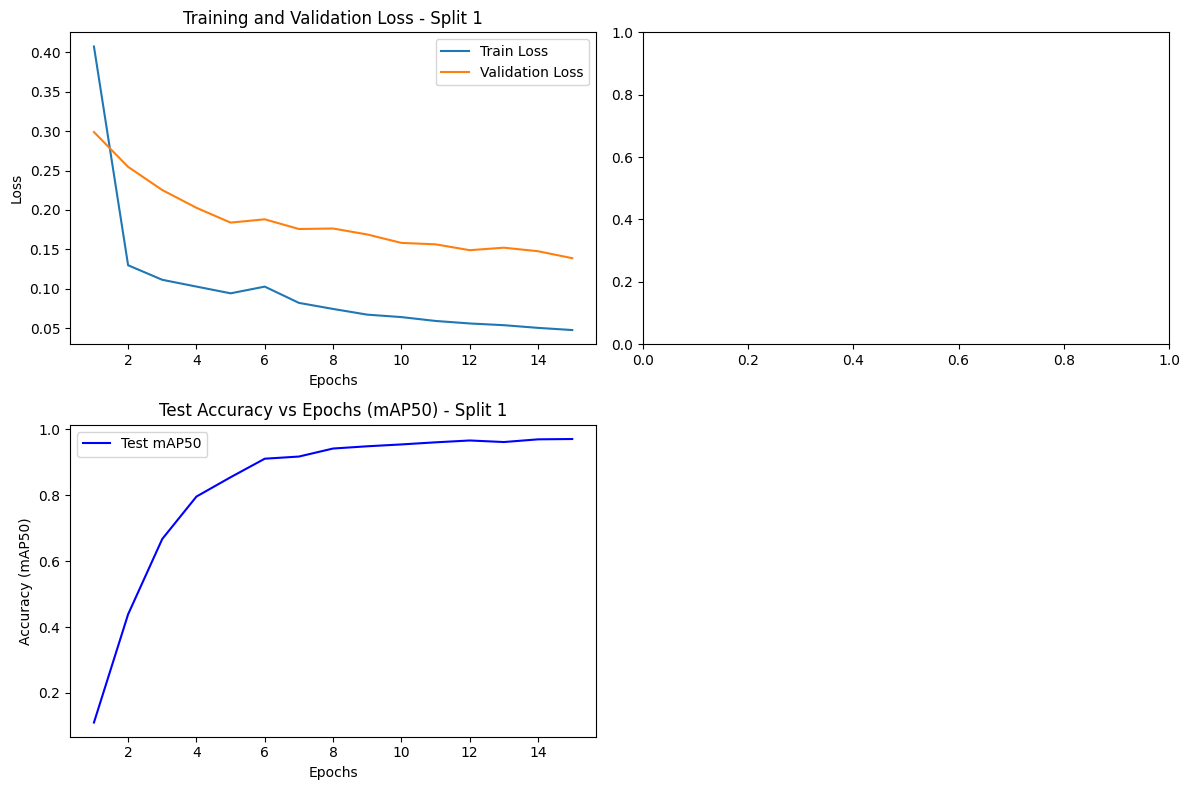

Training on Split 2
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/content/dataset/split2/flowers102.yaml, epochs=15, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=4, project=runs/flowers, name=split_2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False,

train: Scanning /content/dataset/split2/train/labels... 4094 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4094/4094 [00:02<00:00, 1405.67it/s]


train: New cache created: /content/dataset/split2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/split2/val/labels... 2047 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2047/2047 [00:01<00:00, 1300.00it/s]

val: New cache created: /content/dataset/split2/val/labels.cache


Plotting labels to runs/flowers/split_2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=9.4e-05, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/flowers/split_2
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      4.27G     0.4052      4.365      1.148         38        640: 100%|██████████| 256/256 [01:11<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:15<00:00,  4.11it/s]


                   all       2047       2047      0.384      0.164      0.115      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      4.37G     0.1337      2.863      0.941         45        640: 100%|██████████| 256/256 [01:09<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.28it/s]


                   all       2047       2047      0.557      0.401      0.439      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      4.22G     0.1112      2.121     0.9151         44        640: 100%|██████████| 256/256 [01:08<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.31it/s]


                   all       2047       2047       0.69      0.615      0.693      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      4.22G     0.1043      1.746     0.9074         39        640: 100%|██████████| 256/256 [01:08<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.31it/s]

                   all       2047       2047      0.766      0.707      0.799      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      4.24G    0.09566      1.461     0.9042         42        640: 100%|██████████| 256/256 [01:08<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.28it/s]

                   all       2047       2047      0.826      0.802      0.881      0.881


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      4.22G     0.1012      1.251     0.8975         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.37it/s]

                   all       2047       2047       0.87      0.795      0.893      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      4.23G    0.08164     0.9158     0.8799         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.41it/s]

                   all       2047       2047      0.887      0.852      0.928      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      4.23G    0.07523      0.748     0.8746         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.29it/s]

                   all       2047       2047      0.889      0.869      0.937      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      4.23G    0.06833     0.6307     0.8692         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.35it/s]

                   all       2047       2047      0.898      0.891      0.943      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      4.23G    0.06426     0.5432     0.8634         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.35it/s]

                   all       2047       2047      0.898      0.906      0.955      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      4.23G    0.05981     0.4849     0.8658         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.38it/s]

                   all       2047       2047      0.915      0.903      0.956      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      4.23G    0.05725     0.4206     0.8679         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.33it/s]

                   all       2047       2047      0.927      0.913      0.959      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      4.23G    0.05257     0.3858     0.8598         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.40it/s]

                   all       2047       2047      0.934      0.905      0.964      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      4.22G       0.05     0.3486     0.8643         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.39it/s]

                   all       2047       2047      0.942      0.905      0.964      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      4.23G    0.04766     0.3223     0.8607         14        640: 100%|██████████| 256/256 [01:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:14<00:00,  4.40it/s]

                   all       2047       2047      0.939       0.92      0.967      0.967



15 epochs completed in 0.354 hours.
Optimizer stripped from runs/flowers/split_2/weights/last.pt, 18.6MB
Optimizer stripped from runs/flowers/split_2/weights/best.pt, 18.6MB

Validating runs/flowers/split_2/weights/best.pt...
Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5s summary (fused): 193 layers, 9,151,010 parameters, 0 gradients, 24.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:25<00:00,  2.51it/s]


                   all       2047       2047      0.954       0.94      0.976      0.976
               class_1         10         10          1      0.901      0.995      0.995
               class_2         15         15          1      0.746       0.98       0.98
               class_3         10         10      0.949        0.9      0.978      0.978
               class_4         14         14          1      0.638      0.867      0.867
               class_5         16         16          1      0.819      0.991      0.991
               class_6         11         11      0.996          1      0.995      0.995
               class_7         10         10      0.977        0.9      0.978      0.978
               class_8         21         21      0.967          1      0.995      0.995
               class_9         12         12      0.901          1      0.995      0.995
              class_10         11         11      0.969          1      0.995      0.995
              class_1

val: Scanning /content/dataset/split2/test/labels... 2048 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2048/2048 [00:01<00:00, 1360.48it/s]


val: New cache created: /content/dataset/split2/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [00:20<00:00,  6.18it/s]


                   all       2048       2048       0.94      0.938      0.971      0.971
               class_1         10         10      0.962          1      0.995      0.995
               class_2         15         15      0.961      0.867       0.94       0.94
               class_3         10         10      0.754      0.614      0.785      0.785
               class_4         14         14      0.954      0.571      0.836      0.836
               class_5         16         16          1       0.84      0.977      0.977
               class_6         11         11      0.961      0.909      0.971      0.971
               class_7         10         10      0.882          1      0.995      0.995
               class_8         22         22      0.944          1      0.995      0.995
               class_9         11         11      0.877          1      0.995      0.995
              class_10         11         11       0.91      0.922      0.988      0.988
              class_1

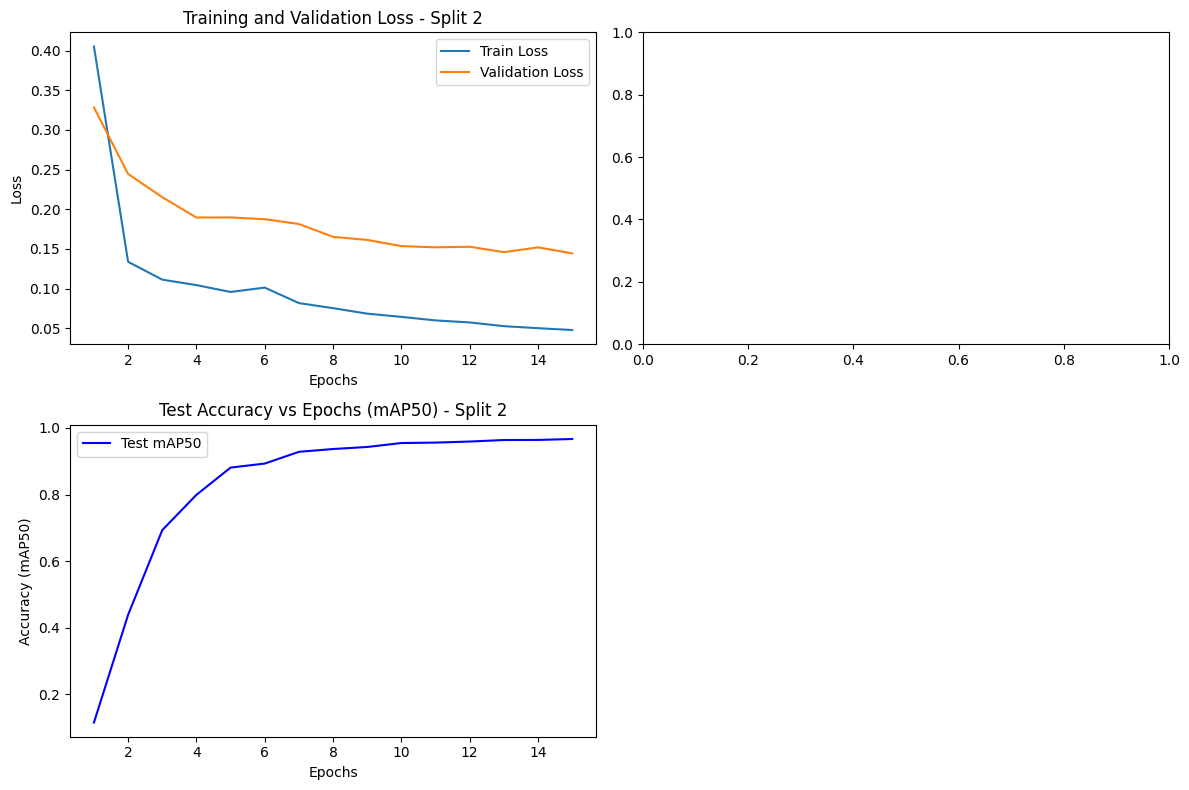

In [8]:
import os
import shutil
from pathlib import Path
import numpy as np
import yaml
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
from ultralytics import YOLO
from sklearn.model_selection import train_test_split

def prepare_dataset(image_dir, labels_mat, dataset_dir, split_seed):
    dataset_dir = Path(dataset_dir)
    dataset_dir.mkdir(parents=True, exist_ok=True)
    labels = loadmat(labels_mat)["labels"][0]
    indices = list(range(len(labels)))

    train_ids, temp_ids = train_test_split(
        indices,
        test_size=0.5,
        stratify=[labels[i] for i in indices],
        random_state=split_seed
    )
    val_ids, test_ids = train_test_split(
        temp_ids,
        test_size=0.5,
        stratify=[labels[i] for i in temp_ids],
        random_state=split_seed
    )
    splits = {
        'train': train_ids,
        'val': val_ids,
        'test': test_ids
    }

    for split in splits:
        (dataset_dir / split / 'images').mkdir(parents=True, exist_ok=True)
        (dataset_dir / split / 'labels').mkdir(parents=True, exist_ok=True)
    for split, ids in splits.items():
        split_image_dir = dataset_dir / split / 'images'
        split_label_dir = dataset_dir / split / 'labels'
        for idx in ids:
            img_name = f"image_{idx + 1:05d}.jpg"
            label_name = f"image_{idx + 1:05d}.txt"

            shutil.copy(
                Path(image_dir) / img_name,
                split_image_dir / img_name
            )

            label_path = split_label_dir / label_name
            with open(label_path, 'w') as label_file:
                label = labels[idx] - 1
                label_file.write(f"{label} 0.5 0.5 1.0 1.0\n")

    classes = [f"class_{i}" for i in range(1, 103)]
    data_yaml = {
        "train": str(dataset_dir / "train" / "images"),
        "val": str(dataset_dir / "val" / "images"),
        "test": str(dataset_dir / "test" / "images"),
        "nc": len(classes),
        "names": classes,
    }
    yaml_path = dataset_dir / "flowers102.yaml"
    with open(yaml_path, "w") as f:
        yaml.dump(data_yaml, f)
    return yaml_path

def train_model(yaml_config, split_number):
    model = YOLO("yolov5s.pt")
    results = model.train(
        data=str(yaml_config),
        epochs=15,
        imgsz=640,
        batch=16,
        device=0,
        patience=5,
        plots=True,
        augment=True,
        workers=4,
        lr0=0.01,
        lrf=0.1,
        project='runs/flowers',
        name=f'split_{split_number}'
    )

    # Load the best model weights (got them after training)
    best_model_path = Path(f'runs/flowers/split_{split_number}/weights/best.pt')
    model = YOLO(best_model_path)

    # Test- 0.25%
    test_results = model.val(data=str(yaml_config), split="test", plots=True)

    metrics_csv = Path(f'runs/flowers/split_{split_number}/results.csv')
    if metrics_csv.exists():
        metrics_df = pd.read_csv(metrics_csv)
        plt.figure(figsize=(12, 8))
        plt.subplot(2, 2, 1)
        plt.plot(metrics_df['epoch'], metrics_df['train/box_loss'], label='Train Loss')
        plt.plot(metrics_df['epoch'], metrics_df['val/box_loss'], label='Validation Loss')
        plt.title(f'Training and Validation Loss - Split {split_number}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        # Test Metrics
        plt.subplot(2, 2, 2)
        test_columns = [col for col in metrics_df.columns if 'test' in col]
        if test_columns:
            for col in test_columns:
                plt.plot(metrics_df['epoch'], metrics_df[col], label=col)
            plt.title(f'Test Metrics - Split {split_number}')
            plt.xlabel('Epochs')
            plt.ylabel('Score')
            plt.legend()

        # Test Accuracy (mAP50)
        test_accuracy = metrics_df['metrics/mAP50(B)']
        epochs = metrics_df['epoch']
        plt.subplot(2, 2, 3)
        plt.plot(epochs, test_accuracy, label='Test mAP50', color='blue')
        plt.title(f'Test Accuracy vs Epochs (mAP50) - Split {split_number}')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (mAP50)')
        plt.legend()


        # test_entropy = -test_accuracy * np.log(test_accuracy + 1e-10)  # Placeholder for entropy
        # # Plot Entropy vs Epoch for Test Data

        # plt.subplot(2, 2, 4)
        # plt.plot(epochs, test_entropy, label='Test Entropy', color='red')
        # plt.title(f'Test Entropy vs Epochs - Split {split_number}')
        # plt.xlabel('Epochs')
        # plt.ylabel('Entropy')
        # plt.legend()

        plt.tight_layout()
        plt.savefig(f'metrics_plot_split_{split_number}.png')
        plt.show()
    return results, test_results

def main():
    dataset_dir = Path("/content/dataset")
    image_dir = "flowers/jpg"
    labels_mat = "imagelabels.mat"

    yaml_configs = [
        prepare_dataset(image_dir, labels_mat, dataset_dir / 'split1', split_seed=42),
        prepare_dataset(image_dir, labels_mat, dataset_dir / 'split2', split_seed=123)
    ]

    for i, yaml_config in enumerate(yaml_configs, 1):
        print(f"Training on Split {i}")
        results = train_model(yaml_config, i)

if __name__ == "__main__":
    main()



0: 544x640 1 class_77, 16.0ms
Speed: 2.8ms preprocess, 16.0ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 640)

0: 640x480 1 class_77, 11.9ms
Speed: 2.6ms preprocess, 11.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

0: 512x640 1 class_88, 12.8ms
Speed: 2.7ms preprocess, 12.8ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)

0: 480x640 1 class_88, 12.9ms
Speed: 2.2ms preprocess, 12.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 512x640 1 class_34, 12.7ms
Speed: 2.8ms preprocess, 12.7ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)

0: 448x640 1 class_49, 12.6ms
Speed: 2.4ms preprocess, 12.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


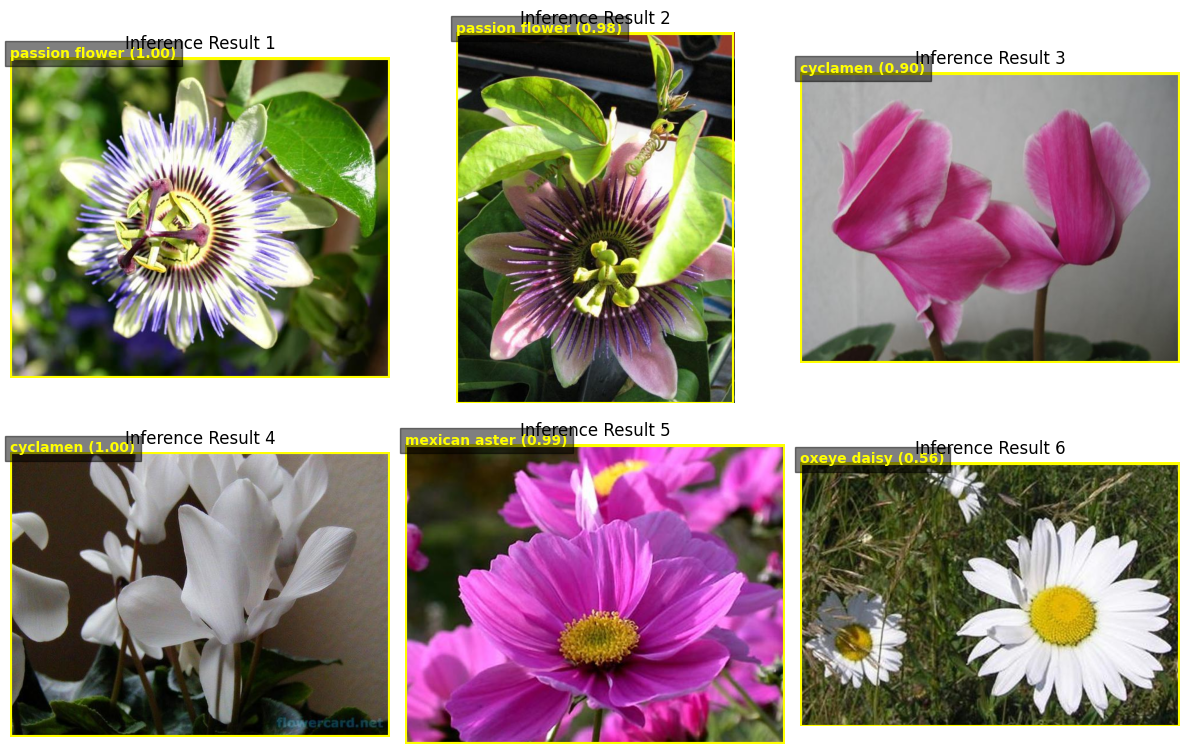

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

flower_dict = {
    0: 'pink primrose', 1: 'hard-leaved pocket orchid', 2: 'canterbury bells', 3: 'sweet pea', 4: 'english marigold',
    5: 'tiger lily', 6: 'moon orchid', 7: 'bird of paradise', 8: 'monkshood', 9: 'globe thistle', 10: 'snapdragon',
    11: "colt's foot", 12: 'king protea', 13: 'spear thistle', 14: 'yellow iris', 15: 'globe-flower', 16: 'purple coneflower',
    17: 'peruvian lily', 18: 'balloon flower', 19: 'giant white arum lily', 20: 'fire lily', 21: 'pincushion flower',
    22: 'fritillary', 23: 'red ginger', 24: 'grape hyacinth', 25: 'corn poppy', 26: 'prince of wales feathers', 27: 'stemless gentian',
    28: 'artichoke', 29: 'sweet william', 30: 'carnation', 31: 'garden phlox', 32: 'love in the mist', 33: 'mexican aster',
    34: 'alpine sea holly', 35: 'ruby-lipped cattleya', 36: 'cape flower', 37: 'great masterwort', 38: 'siam tulip',
    39: 'lenten rose', 40: 'barbeton daisy', 41: 'daffodil', 42: 'sword lily', 43: 'poinsettia', 44: 'bolero deep blue',
    45: 'wallflower', 46: 'marigold', 47: 'buttercup', 48: 'oxeye daisy', 49: 'common dandelion', 50: 'petunia', 51: 'wild pansy',
    52: 'primula', 53: 'sunflower', 54: 'pelargonium', 55: 'bishop of llandaff', 56: 'gaura', 57: 'geranium',
    58: 'orange dahlia', 59: 'pink-yellow dahlia', 60: 'cautleya spicata', 61: 'japanese anemone', 62: 'black-eyed susan',
    63: 'silverbush', 64: 'californian poppy', 65: 'osteospermum', 66: 'spring crocus', 67: 'bearded iris', 68: 'windflower',
    69: 'tree poppy', 70: 'gazania', 71: 'azalea', 72: 'water lily', 73: 'rose', 74: 'thorn apple', 75: 'morning glory',
    76: 'passion flower', 77: 'lotus lotus', 78: 'toad lily', 79: 'anthurium', 80: 'frangipani', 81: 'clematis', 82: 'hibiscus',
    83: 'columbine', 84: 'desert-rose', 85: 'tree mallow', 86: 'magnolia', 87: 'cyclamen', 88: 'watercress', 89: 'canna lily',
    90: 'hippeastrum', 91: 'bee balm', 92: 'ball moss', 93: 'foxglove', 94: 'bougainvillea', 95: 'camellia', 96: 'mallow',
    97: 'mexican petunia', 98: 'bromelia', 99: 'blanket flower', 100: 'trumpet creeper', 101: 'blackberry lily'
}

model_path = '/content/yolov5/runs/flowers/split_2/weights/best.pt'
model = YOLO(model_path)

test_image_paths = [
    "/content/yolov5/flowers/jpg/image_00001.jpg",
    "/content/yolov5/flowers/jpg/image_00003.jpg",
    "/content/yolov5/flowers/jpg/image_00569.jpg",
    "/content/yolov5/flowers/jpg/image_00546.jpg",
    "/content/yolov5/flowers/jpg/image_06949.jpg",
    "/content/yolov5/flowers/jpg/image_06200.jpg"
]


def display_results_in_grid(test_image_paths):
    n_images = len(test_image_paths)
    grid_size = (2, (n_images + 1) // 2)
    fig, axes = plt.subplots(*grid_size, figsize=(12, 8))
    axes = axes.flatten()

    for idx, test_image_path in enumerate(test_image_paths):
        if not os.path.exists(test_image_path):
            print(f"Error: The image file at {test_image_path} does not exist.")
            continue
        img = cv2.imread(test_image_path)
        if img is None:
            print(f"Error: Failed to read the image at {test_image_path}.")
            continue
        else:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            results = model(img)
            boxes = results[0].boxes.xyxy.cpu().numpy()
            confidences = results[0].boxes.conf.cpu().numpy()
            labels = results[0].boxes.cls.cpu().numpy()
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(f"Inference Result {idx + 1}", fontsize=12)

            for box, confidence, label in zip(boxes, confidences, labels):
                x1, y1, x2, y2 = box
                flower_name = flower_dict[int(label)]
                axes[idx].add_patch(plt.Rectangle(
                    (x1, y1), x2 - x1, y2 - y1, fill=False, color='yellow', linewidth=3))
                axes[idx].text(x1, y1, f"{flower_name} ({confidence:.2f})",
                               color='yellow', fontsize=10, fontweight='bold', bbox=dict(facecolor='black', alpha=0.5))

    plt.tight_layout()
    plt.show()

display_results_in_grid(test_image_paths)

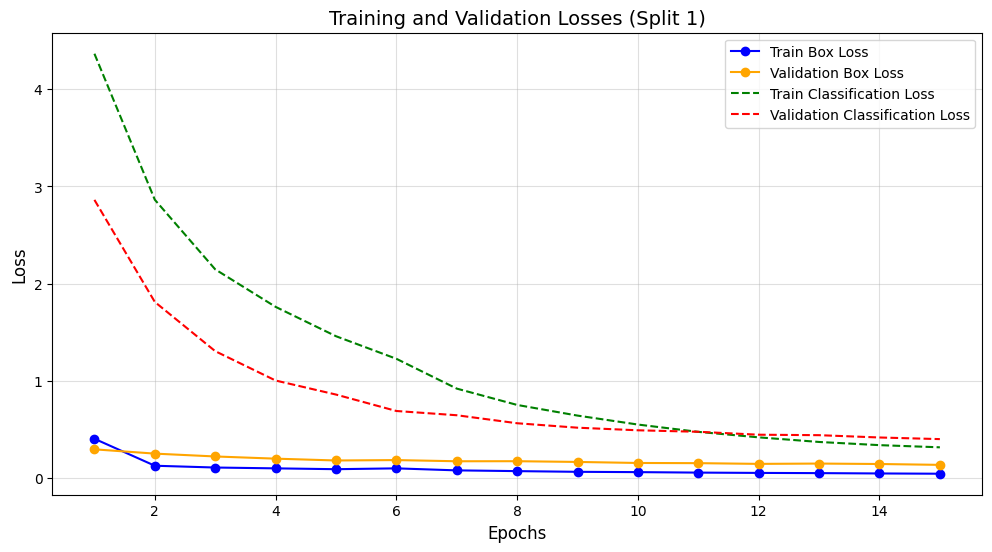

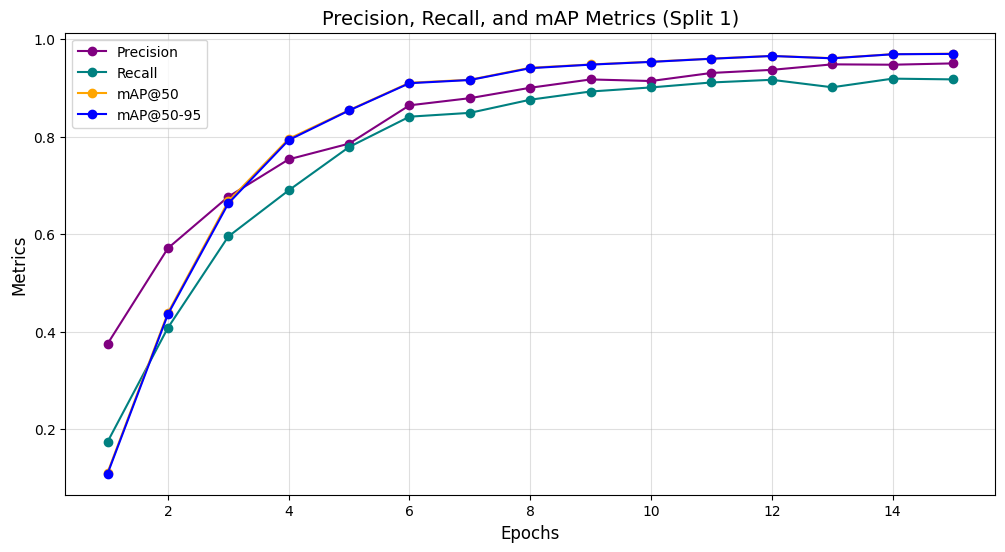

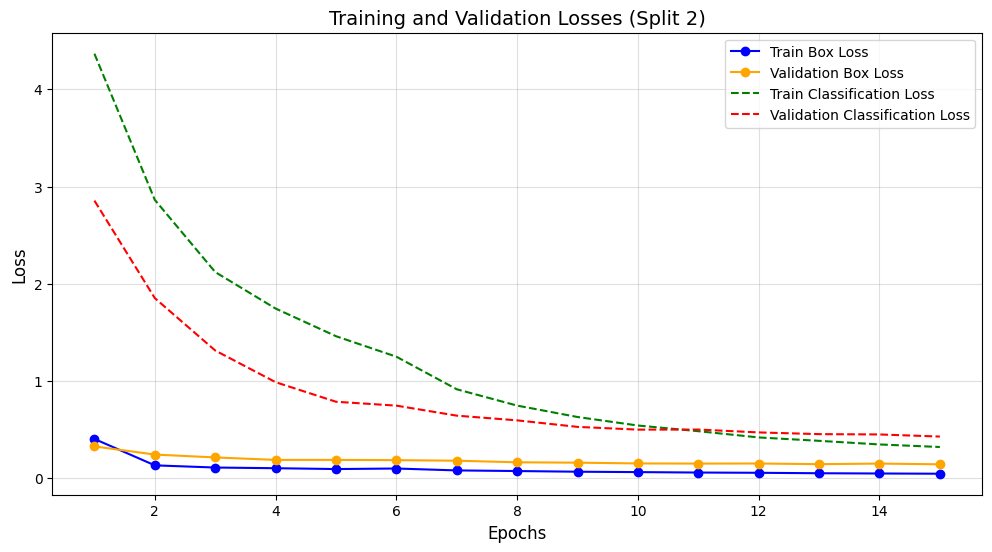

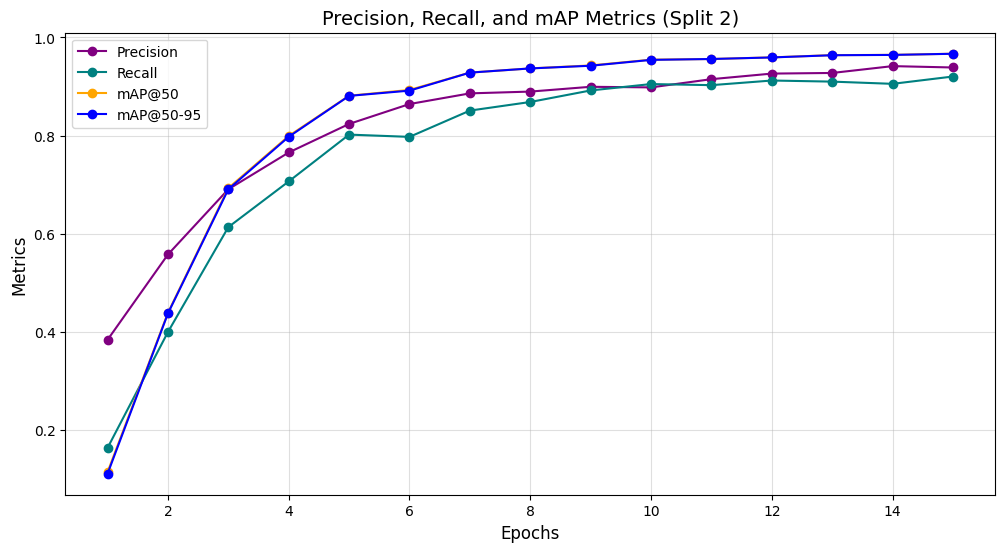

In [ ]:
def plot_metrics_and_losses(results_csv_path, split_number):
    try:
        df = pd.read_csv(results_csv_path)
    except FileNotFoundError:
        print(f"Error: Results file {results_csv_path} not found.")
        return
    except Exception as e:
        print(f"An error occurred: {e}")
        return

    plt.figure(figsize=(12, 6))
    if "train/box_loss" in df.columns and "val/box_loss" in df.columns:
        plt.plot(df['epoch'], df['train/box_loss'], label="Train Box Loss", color="blue", marker="o")
        plt.plot(df['epoch'], df['val/box_loss'], label="Validation Box Loss", color="orange", marker="o")

    if "train/cls_loss" in df.columns and "val/cls_loss" in df.columns:
        plt.plot(df['epoch'], df['train/cls_loss'], label="Train Classification Loss", color="green", linestyle="--")
        plt.plot(df['epoch'], df['val/cls_loss'], label="Validation Classification Loss", color="red", linestyle="--")

    plt.title(f"Training and Validation Losses (Split {split_number})", fontsize=14)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.4)
    plt.savefig(f'loss_plot_split_{split_number}.png')
    plt.show()

    plt.figure(figsize=(12, 6))
    if "metrics/precision(B)" in df.columns:
        plt.plot(df['epoch'], df['metrics/precision(B)'], label="Precision", color="purple", marker="o")
    if "metrics/recall(B)" in df.columns:
        plt.plot(df['epoch'], df['metrics/recall(B)'], label="Recall", color="teal", marker="o")
    if "metrics/mAP50(B)" in df.columns:
        plt.plot(df['epoch'], df['metrics/mAP50(B)'], label="mAP@50", color="orange", marker="o")
    if "metrics/mAP50-95(B)" in df.columns:
        plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label="mAP@50-95", color="blue", marker="o")

    plt.title(f"Precision, Recall, and mAP Metrics (Split {split_number})", fontsize=14)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Metrics", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.4)
    plt.savefig(f'metrics_plot_split_{split_number}.png')
    plt.show()

split_1_csv_path = "/content/yolov5/runs/flowers/split_1/results.csv"
split_2_csv_path = "/content/yolov5/runs/flowers/split_2/results.csv"
plot_metrics_and_losses(split_1_csv_path, split_number=1)
plot_metrics_and_losses(split_2_csv_path, split_number=2)


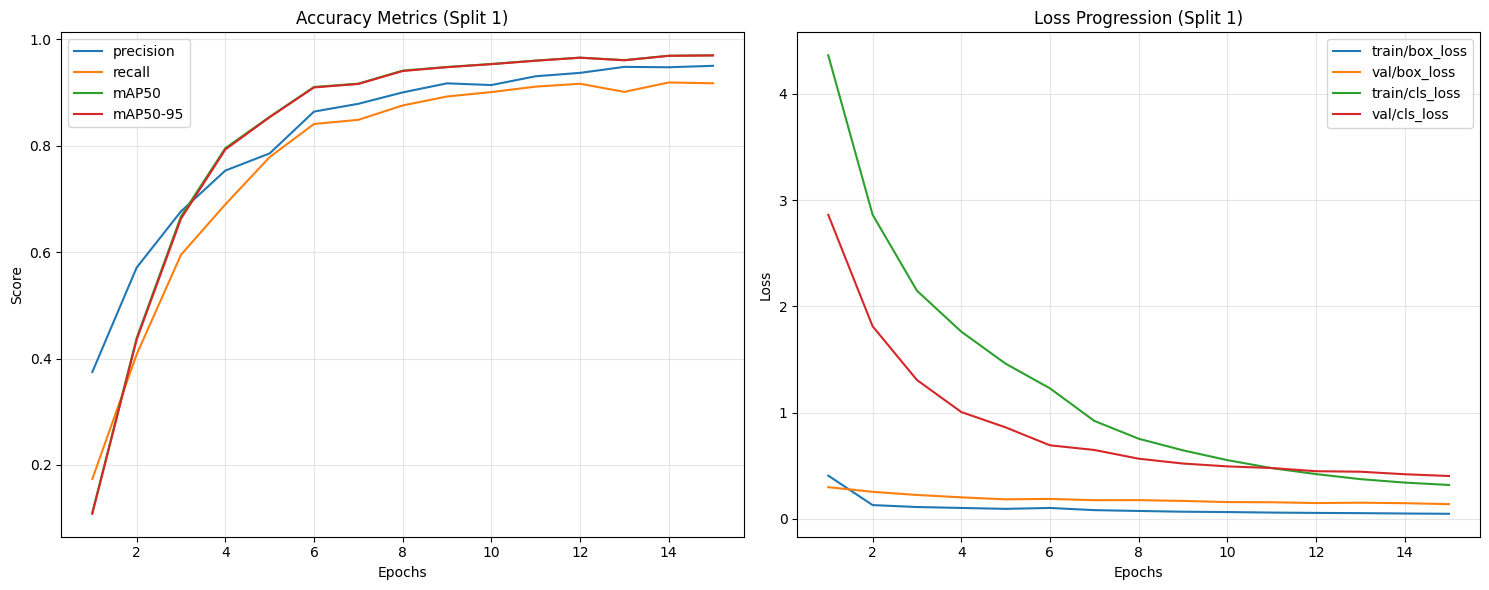

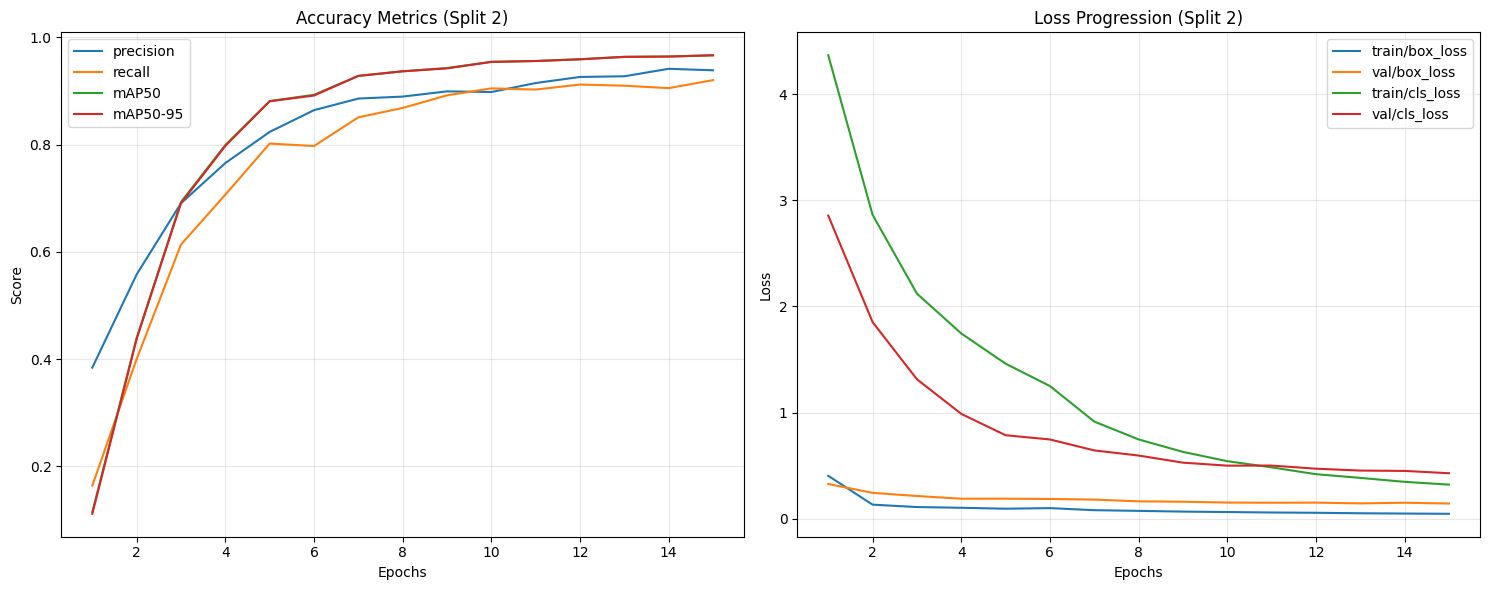

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_detailed_performance(results_csv_path, split_number):
    try:
        df = pd.read_csv(results_csv_path)
    except Exception as e:
        print(f"Error reading CSV: {e}")
        return
    # Accuracy & Cross Entropy Graphs
    plt.figure(figsize=(15, 6))
    # Accuracy Graph
    plt.subplot(1, 2, 1)
    metrics_columns = [
        'metrics/precision(B)',
        'metrics/recall(B)',
        'metrics/mAP50(B)',
        'metrics/mAP50-95(B)'
    ]

    for col in metrics_columns:
        if col in df.columns:
            plt.plot(df['epoch'], df[col], label=col.split('/')[-1].replace('(B)', ''))
    plt.title(f'Accuracy Metrics (Split {split_number})')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(alpha=0.3)

    # Cross Entropy Graph
    plt.subplot(1, 2, 2)
    loss_columns = [
        'train/box_loss',
        'val/box_loss',
        'train/cls_loss',
        'val/cls_loss'
    ]

    for col in loss_columns:
        if col in df.columns:
            plt.plot(df['epoch'], df[col], label=col)

    plt.title(f'Loss Progression (Split {split_number})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

split_1_csv_path = "/content/yolov5/runs/flowers/split_1/results.csv"
split_2_csv_path = "/content/yolov5/runs/flowers/split_2/results.csv"
plot_detailed_performance(split_1_csv_path, split_number=1)
plot_detailed_performance(split_2_csv_path, split_number=2)

In [ ]:
metrics_df = pd.read_csv(f'runs/flowers/split_2/results.csv')
print(metrics_df.tail())

    epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
10     11   971.283         0.05981         0.48490         0.86577   
11     12  1058.170         0.05725         0.42064         0.86793   
12     13  1145.070         0.05257         0.38577         0.85977   
13     14  1231.820         0.05000         0.34860         0.86427   
14     15  1318.720         0.04766         0.32228         0.86067   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
10               0.91495            0.90277           0.95601   
11               0.92630            0.91219           0.95932   
12               0.92759            0.90996           0.96388   
13               0.94152            0.90544           0.96440   
14               0.93871            0.92037           0.96675   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
10              0.95601       0.15194       0.50175       0.42898  0.000038   
11              0.95918 

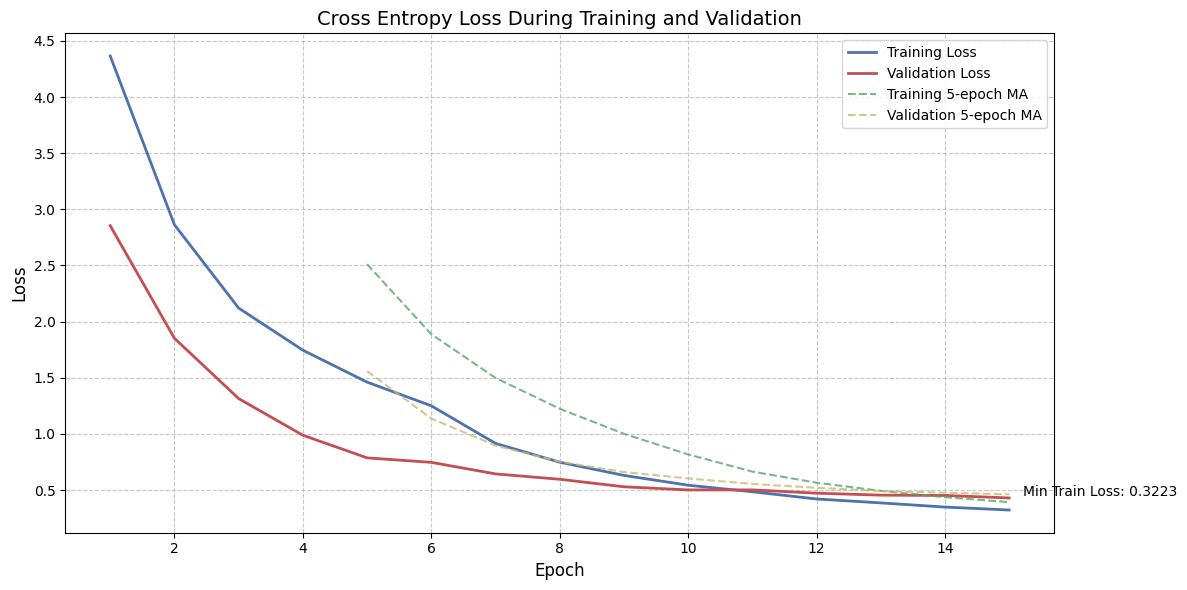

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd

def plot_cross_entropy(results_file='/content/yolov5/runs/flowers/split_2/results.csv', save_dir=None):
    results_path = Path(results_file)
    if not results_path.exists():
        raise FileNotFoundError(f"Results file not found: {results_file}")
    data = pd.read_csv(results_path)
    epochs = data['epoch'].values

    plt.figure(figsize=(12, 6))
    # Plot training loss
    plt.plot(epochs, data['train/cls_loss'], 'b-',
             label='Training Loss', linewidth=2)
    # Plot validation loss
    if 'val/cls_loss' in data.columns:
        plt.plot(epochs, data['val/cls_loss'], 'r-',
                label='Validation Loss', linewidth=2)

    # Addition of moving averages (for smoothness and trends)
    window = 5
    train_ma = pd.Series(data['train/cls_loss']).rolling(window=window).mean()
    plt.plot(epochs, train_ma, 'g--',
             label=f'Training {window}-epoch MA',
             alpha=0.8)

    if 'val/cls_loss' in data.columns:
        val_ma = pd.Series(data['val/cls_loss']).rolling(window=window).mean()
        plt.plot(epochs, val_ma, 'y--',
                label=f'Validation {window}-epoch MA',
                alpha=0.8)

    plt.title('Cross Entropy Loss During Training and Validation', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)

    # Add min/max annotations
    min_train = data['train/cls_loss'].min()
    min_epoch = data.loc[data['train/cls_loss'].idxmin(), 'epoch']
    plt.annotate(f'Min Train Loss: {min_train:.4f}',
                xy=(min_epoch, min_train),
                xytext=(10, 10),
                textcoords='offset points')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_cross_entropy(
        results_file='/content/yolov5/runs/flowers/split_2/results.csv'
    )